In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Replace with your actual file URL
url = "/Users/rishabhparakh/Downloads/data (1).csv"

# Load CSV
df = pd.read_csv(url)
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


clean and formatting

In [2]:
# Format categorical and binary features
df['Vehicle_Age'] = df['Vehicle_Age'].replace({
    '> 2 Years': 'Over 2 Years',
    '1-2 Year': '1-2 Years',
    '< 1 Year': 'Under 1 Year'
})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].astype('category')
df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
df['Previously_Insured'] = df['Previously_Insured'].astype('bool')
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,False,Over 2 Years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,False,1-2 Years,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,False,Over 2 Years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,True,Under 1 Year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,True,Under 1 Year,0,27496.0,152.0,39,0


Q1: 📌 What’s the gender-wise distribution of buyers?

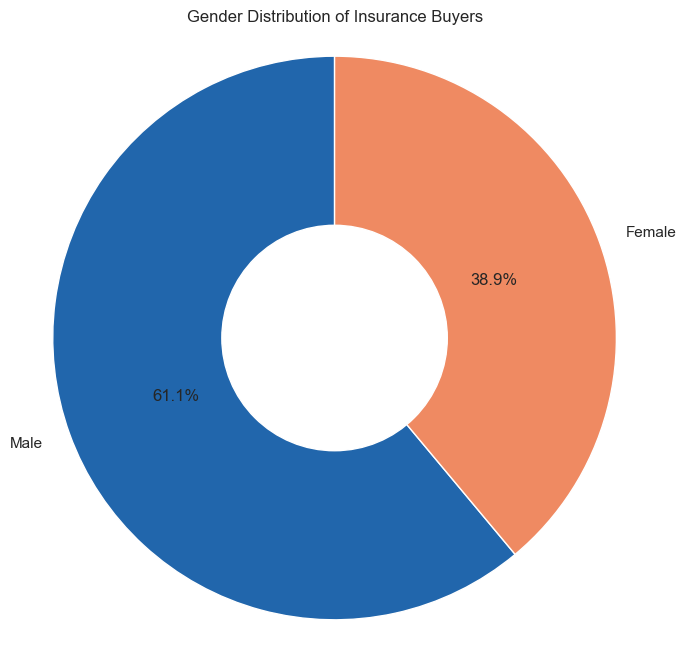

In [5]:
import matplotlib.pyplot as plt

# Filter only buyers (Response == 1)
gender_counts = df[df['Response'] == 1]['Gender'].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create pie chart - remove shadow parameter or set it to False
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
       startangle=90, shadow=False,  # Changed shadow to False
       colors=['#2166ac', '#ef8a62'])  # Using RdBu-like colors

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Gender Distribution of Insurance Buyers')

# Display the figure
plt.show()

Q2: Age-wise purchase tendency

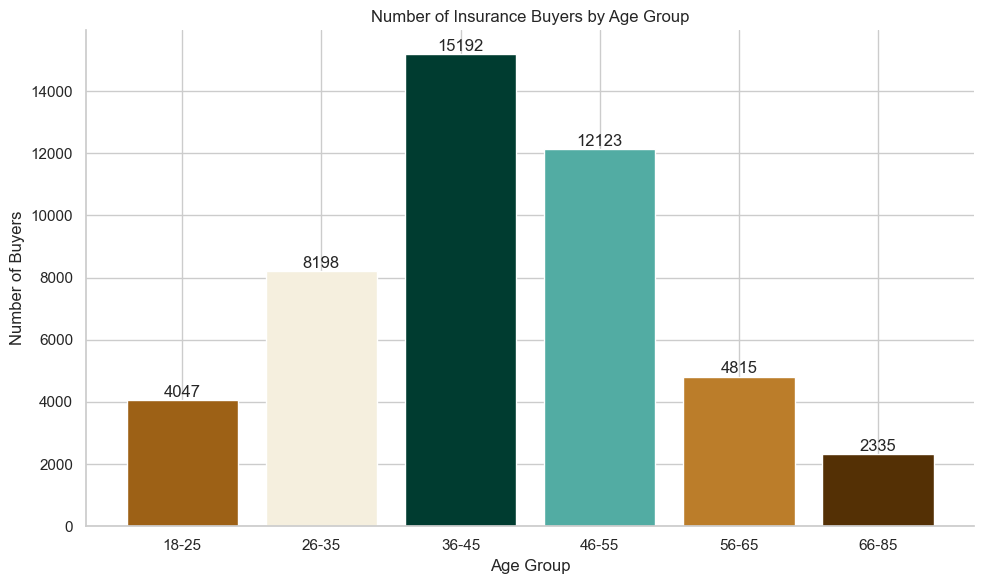

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 65, 85],
                      labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-85'])

# Count buyers by age group
age_group_response = df[df['Response'] == 1]['Age_Group'].value_counts().sort_index().reset_index()
age_group_response.columns = ['Age_Group', 'Buyers']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create color map - using Blues colormap
cmap = cm.get_cmap('BrBG')
# Normalize values for color mapping
norm = plt.Normalize(age_group_response['Buyers'].min(), age_group_response['Buyers'].max())
colors = cmap(norm(age_group_response['Buyers']))

# Create bar chart
bars = ax.bar(age_group_response['Age_Group'], age_group_response['Buyers'], color=colors)

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{height:.0f}', ha='center', va='bottom')

# Set title and labels
ax.set_title('Number of Insurance Buyers by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Buyers')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Q3: Which vehicle age groups are converting better?

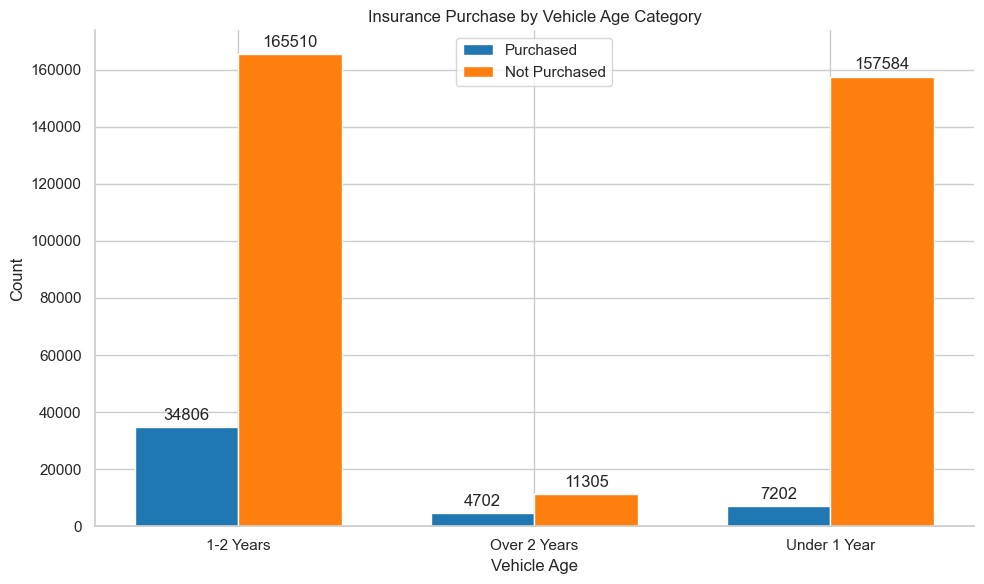

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Count responses by vehicle age
vehicle_age_counts = df.groupby(['Vehicle_Age', 'Response']).size().reset_index(name='Count')
vehicle_age_counts['Response'] = vehicle_age_counts['Response'].map({1: 'Purchased', 0: 'Not Purchased'})

# Get unique vehicle ages and response types
vehicle_ages = vehicle_age_counts['Vehicle_Age'].unique()
response_types = vehicle_age_counts['Response'].unique()

# Set width of bars
bar_width = 0.35

# Set positions of bars on X axis
r1 = np.arange(len(vehicle_ages))
r2 = [x + bar_width for x in r1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a dictionary to store data by response type
response_data = {}
for response in response_types:
    response_data[response] = vehicle_age_counts[vehicle_age_counts['Response'] == response]

# Create the bars
purchased_bars = ax.bar(r1, response_data['Purchased']['Count'], width=bar_width, label='Purchased', color='#1f77b4')
not_purchased_bars = ax.bar(r2, response_data['Not Purchased']['Count'], width=bar_width, label='Not Purchased', color='#ff7f0e')

# Add data labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(purchased_bars)
add_labels(not_purchased_bars)

# Add labels and title
ax.set_xlabel('Vehicle Age')
ax.set_ylabel('Count')
ax.set_title('Insurance Purchase by Vehicle Age Category')
ax.set_xticks([r + bar_width/2 for r in range(len(vehicle_ages))])
ax.set_xticklabels(vehicle_ages)
ax.legend()

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Q4: Does previous insurance affect new policy purchase?

No Previous Insurance: 22.5% (46552/206481)
Had Previous Insurance: 0.1% (158/174628)


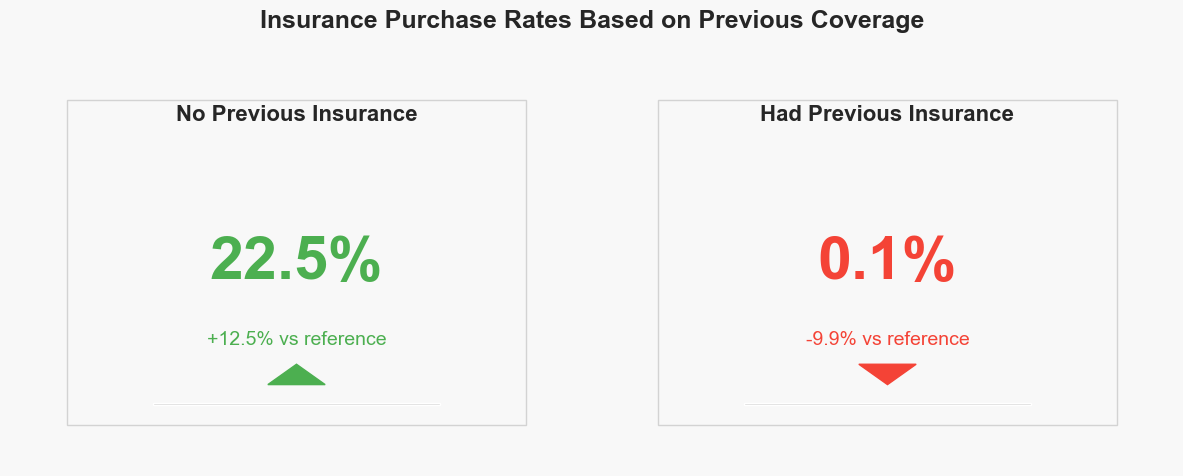

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Calculate the purchase rates by previous insurance status
# Assuming 'Previously_Insured' is a column with 0/1 values and 'Response' indicates purchase (1)
no_ins_total = len(df[df['Previously_Insured'] == 0])
no_ins_purchased = len(df[(df['Previously_Insured'] == 0) & (df['Response'] == 1)])
rate_no_ins = round((no_ins_purchased / no_ins_total) * 100, 1) if no_ins_total > 0 else 0

had_ins_total = len(df[df['Previously_Insured'] == 1])
had_ins_purchased = len(df[(df['Previously_Insured'] == 1) & (df['Response'] == 1)])
rate_had_ins = round((had_ins_purchased / had_ins_total) * 100, 1) if had_ins_total > 0 else 0

reference = 10  # Reference value for comparison

# Print calculated values for verification
print(f"No Previous Insurance: {rate_no_ins}% ({no_ins_purchased}/{no_ins_total})")
print(f"Had Previous Insurance: {rate_had_ins}% ({had_ins_purchased}/{had_ins_total})")

# Create figure with a proper aspect ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
axes = [ax1, ax2]

# Define colors
green_color = '#4CAF50'  # A nicer green
red_color = '#F44336'    # A nicer red

# Function to create a cleaner triangle indicator
def create_triangle(ax, is_positive):
    color = green_color if is_positive else red_color
    y_pos = 0.2  # Base position for the triangle
    
    # Create a cleaner triangle shape
    if is_positive:
        triangle = patches.Polygon([[0.45, y_pos], [0.55, y_pos], [0.5, y_pos+0.05]], 
                                  closed=True, facecolor=color, edgecolor=color, transform=ax.transAxes)
    else:
        triangle = patches.Polygon([[0.45, y_pos+0.05], [0.55, y_pos+0.05], [0.5, y_pos]], 
                                  closed=True, facecolor=color, edgecolor=color, transform=ax.transAxes)
    
    ax.add_patch(triangle)

# Add a subtle border around each panel
def add_panel_border(ax):
    # Draw a rectangle border
    rect = patches.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=1, 
                           edgecolor='lightgray', facecolor='none', 
                           transform=ax.transAxes, zorder=0)
    ax.add_patch(rect)

# Create clean indicators
for i, (label, rate, ax) in enumerate(zip(['No Previous Insurance', 'Had Previous Insurance'], 
                                        [rate_no_ins, rate_had_ins], axes)):
    # Color based on rate
    color = green_color if rate > reference else red_color
    
    # Clear the axis
    ax.clear()
    ax.axis('off')
    
    # Add subtle panel border
    add_panel_border(ax)
    
    # Add title - more space at top
    ax.text(0.5, 0.85, label, fontsize=16, fontweight='bold', 
            ha='center', transform=ax.transAxes)
    
    # Add percentage - larger and bolder
    ax.text(0.5, 0.5, f"{rate}%", fontsize=44, fontweight='bold', 
            ha='center', va='center', color=color, transform=ax.transAxes)
    
    # Add reference comparison text
    delta = rate - reference
    delta_text = f"{'+' if delta > 0 else ''}{delta:.1f}% vs reference"
    ax.text(0.5, 0.3, delta_text, fontsize=14, ha='center', color=color, transform=ax.transAxes)
    
    # Add triangle indicator
    create_triangle(ax, rate > reference)
    
    # Add a horizontal line below the content
    line = patches.Rectangle((0.25, 0.15), 0.5, 0.005, 
                          facecolor='lightgray', transform=ax.transAxes)
    ax.add_patch(line)

# Main title - cleaner
fig.suptitle("Insurance Purchase Rates Based on Previous Coverage", 
             fontsize=18, y=0.95, fontweight='bold')

# Add a subtle background color
fig.patch.set_facecolor('#f8f8f8')
for ax in axes:
    ax.set_facecolor('#f8f8f8')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()

Q5: Which sales channels bring the most conversions?

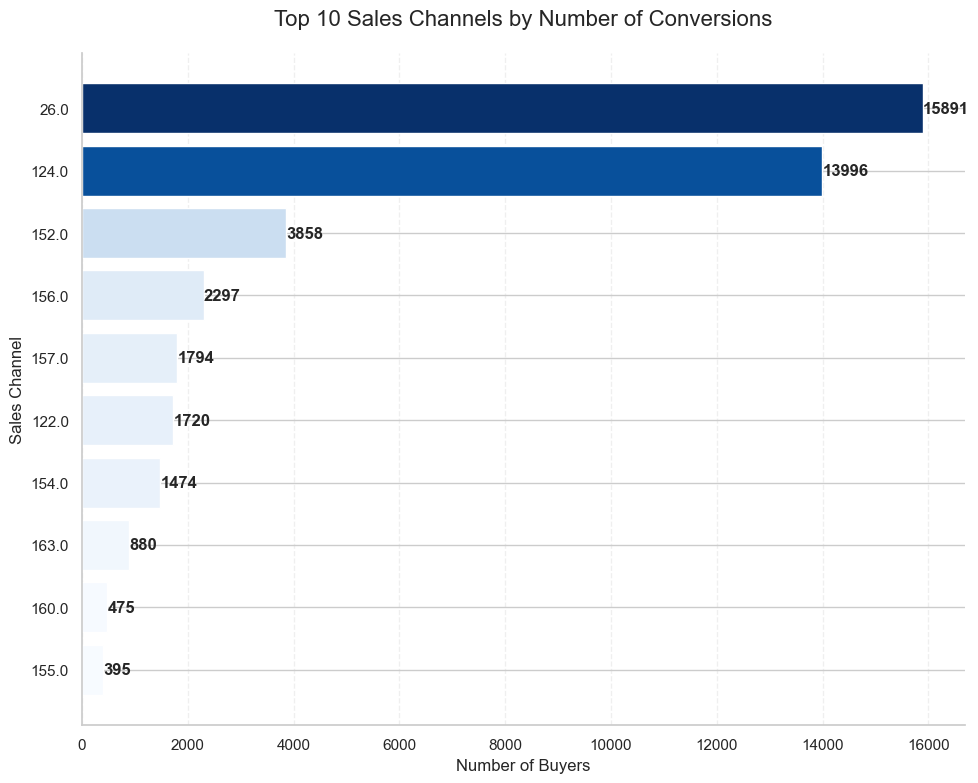

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get top 10 converting sales channels
top_channels = df[df['Response'] == 1]['Policy_Sales_Channel'].value_counts().head(10).reset_index()
top_channels.columns = ['Sales_Channel', 'Conversions']
top_channels = top_channels.sort_values(by='Conversions', ascending=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create color map
cmap = cm.get_cmap('Blues')
norm = plt.Normalize(top_channels['Conversions'].min(), top_channels['Conversions'].max())
colors = cmap(norm(top_channels['Conversions']))

# Plot horizontal bars
bars = ax.barh(top_channels['Sales_Channel'].astype(str), top_channels['Conversions'], color=colors)

# Add data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
            ha='left', va='center', fontweight='bold')

# Set title and labels
ax.set_title('Top 10 Sales Channels by Number of Conversions', fontsize=16, pad=20)
ax.set_xlabel('Number of Buyers', fontsize=12)
ax.set_ylabel('Sales Channel', fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add subtle grid lines
ax.xaxis.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Q6: Do people with damaged vehicles tend to buy more insurance?

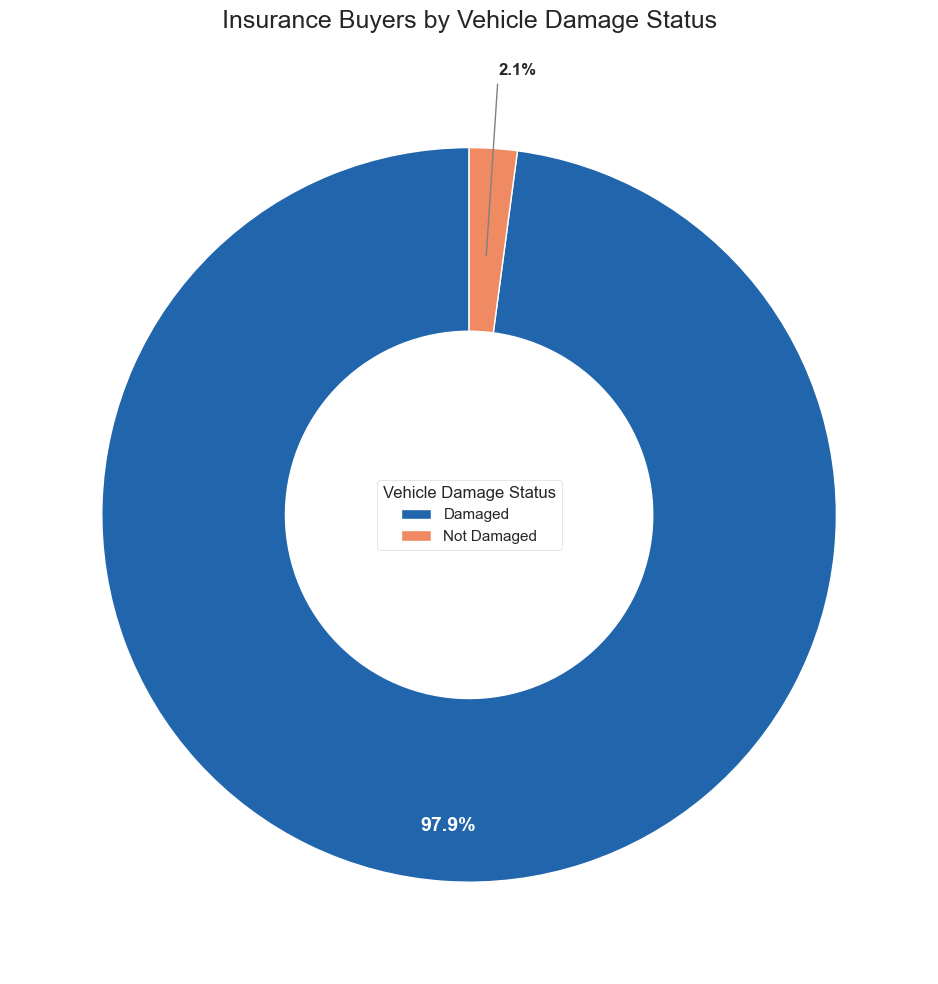

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Count of buyers based on vehicle damage status
damage_response = df[df['Response'] == 1]['Vehicle_Damage'].value_counts().reset_index()
damage_response.columns = ['Vehicle_Damage', 'Buyers']
damage_response['Vehicle_Damage'] = damage_response['Vehicle_Damage'].map({1: 'Damaged', 0: 'Not Damaged'})

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Get data for pie chart
labels = damage_response['Vehicle_Damage']
sizes = damage_response['Buyers']

# Custom colors similar to RdBu
colors = ['#2166ac', '#ef8a62']  # Blue, Red

# Create donut chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=None,  # We'll add custom labels
    colors=colors,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 3 else '',  # Only show text for segments > 3%
    pctdistance=0.85,  # Position percentage labels closer to the outer edge
    startangle=90,
    wedgeprops=dict(width=0.5, edgecolor='w')  # This creates the donut hole
)

# For small segments, add a line and label outside the chart
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    pct = sizes[i] / sum(sizes) * 100
    
    if pct <= 3:  # For small segments
        # Calculate text position
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
        
        # Get angle for horizontal alignment
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        
        # Draw connecting line to small segment
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        ax.annotate(
            f'{pct:.1f}%', 
            xy=(x * 0.7, y * 0.7),  # Point on the wedge
            xytext=(x * 1.2, y * 1.2),  # Position for the text
            horizontalalignment=horizontalalignment,
            arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray'),
            fontsize=12, fontweight='bold'
        )

# Customize text properties for large segments
plt.setp(autotexts, size=14, weight="bold", color="white")

# Add a circle at the center for a cleaner donut hole look
circle = plt.Circle((0, 0), 0.25, fc='white')
fig.gca().add_artist(circle)

# Add legend with custom box
legend = ax.legend(
    wedges, 
    labels,
    title="Vehicle Damage Status",
    loc="center",
    bbox_to_anchor=(0.5, 0.5),
    frameon=True,
    edgecolor='lightgray'
)
legend.get_frame().set_linewidth(0.5)

# Add title
plt.title('Insurance Buyers by Vehicle Damage Status', size=18, pad=20)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

Q7: Are insurance buyers paying higher premiums?

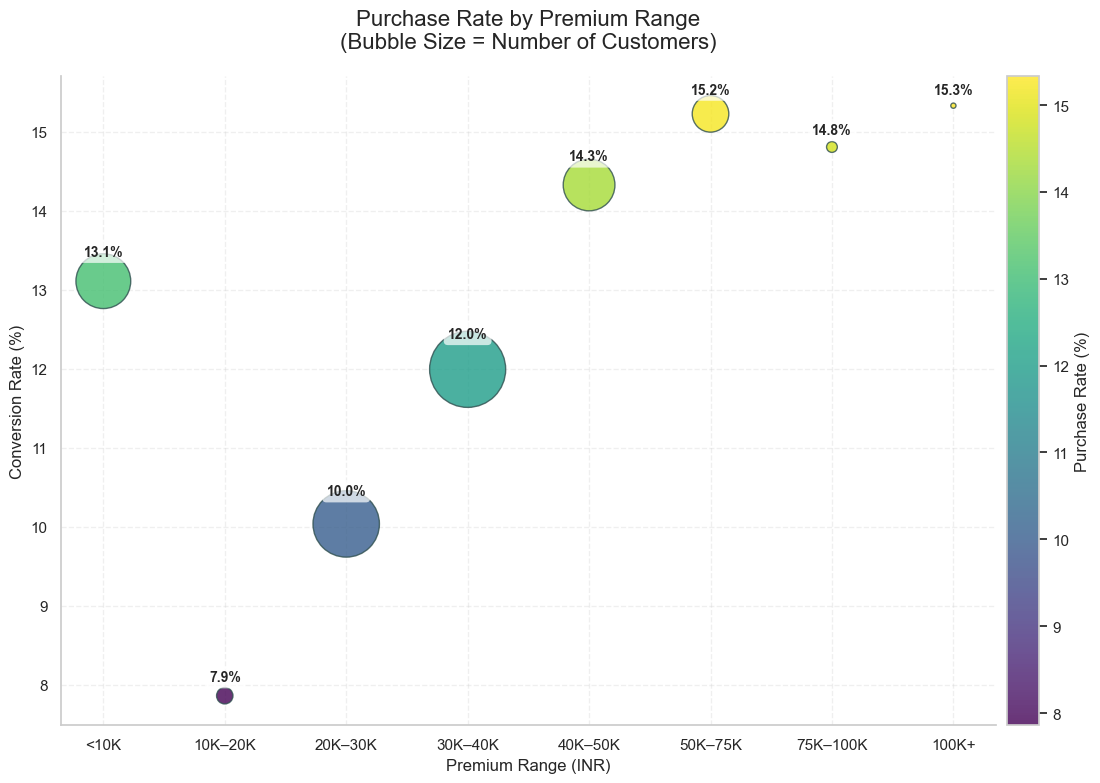

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Group data: total customers and buyers per premium range
group = df.groupby('Premium_Band').agg(
    total_customers=('Response', 'count'),
    buyers=('Response', 'sum')
).reset_index()

# Calculate purchase rate
group['Purchase_Rate'] = (group['buyers'] / group['total_customers']) * 100

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set color map for purchase rate
cmap = cm.get_cmap('viridis')
norm = plt.Normalize(group['Purchase_Rate'].min(), group['Purchase_Rate'].max())
colors = cmap(norm(group['Purchase_Rate']))

# Calculate bubble sizes - scale for better visibility
size_scaling = 3000
sizes = group['total_customers'] / group['total_customers'].max() * size_scaling

# Create bubble chart
scatter = ax.scatter(
    x=range(len(group['Premium_Band'])),
    y=group['Purchase_Rate'],
    s=sizes,
    c=group['Purchase_Rate'],
    cmap='viridis',
    alpha=0.8,
    edgecolors='darkslategrey',
    linewidths=1
)

# Set x-axis ticks and labels
ax.set_xticks(range(len(group['Premium_Band'])))
ax.set_xticklabels(group['Premium_Band'], rotation=0, ha='center')

# Add data labels with better positioning
for i, row in group.iterrows():
    # Adjust position based on bubble size
    offset_y = np.sqrt(sizes[i]/np.pi)/2 + 5
    
    ax.annotate(
        f"{row['Purchase_Rate']:.1f}%",
        (i, row['Purchase_Rate']),
        textcoords="offset points",
        xytext=(0, offset_y),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7)
    )

# Add a colorbar with better position
cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('Purchase Rate (%)')

# Set title and labels with proper alignment
plt.title('Purchase Rate by Premium Range\n(Bubble Size = Number of Customers)', 
         fontsize=16, pad=20, loc='center')
         
ax.set_xlabel('Premium Range (INR)', fontsize=12)
ax.set_ylabel('Conversion Rate (%)', fontsize=12)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a better formatted legend for bubble size
sizes_for_legend = [group['total_customers'].min(), 
                   group['total_customers'].median(), 
                   group['total_customers'].max()]
labels_for_legend = [f"{int(size):,}" for size in sizes_for_legend]
scatter_sizes = [size / group['total_customers'].max() * size_scaling for size in sizes_for_legend]

# Create custom legend with better formatting
handles = []
for size in scatter_sizes:
    handles.append(plt.scatter([],[], s=size, color='gray', alpha=0.7, edgecolors='darkslategrey'))


# Make sure there's enough space at the bottom for the legend
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()

Q8: Which regions convert the most buyers?

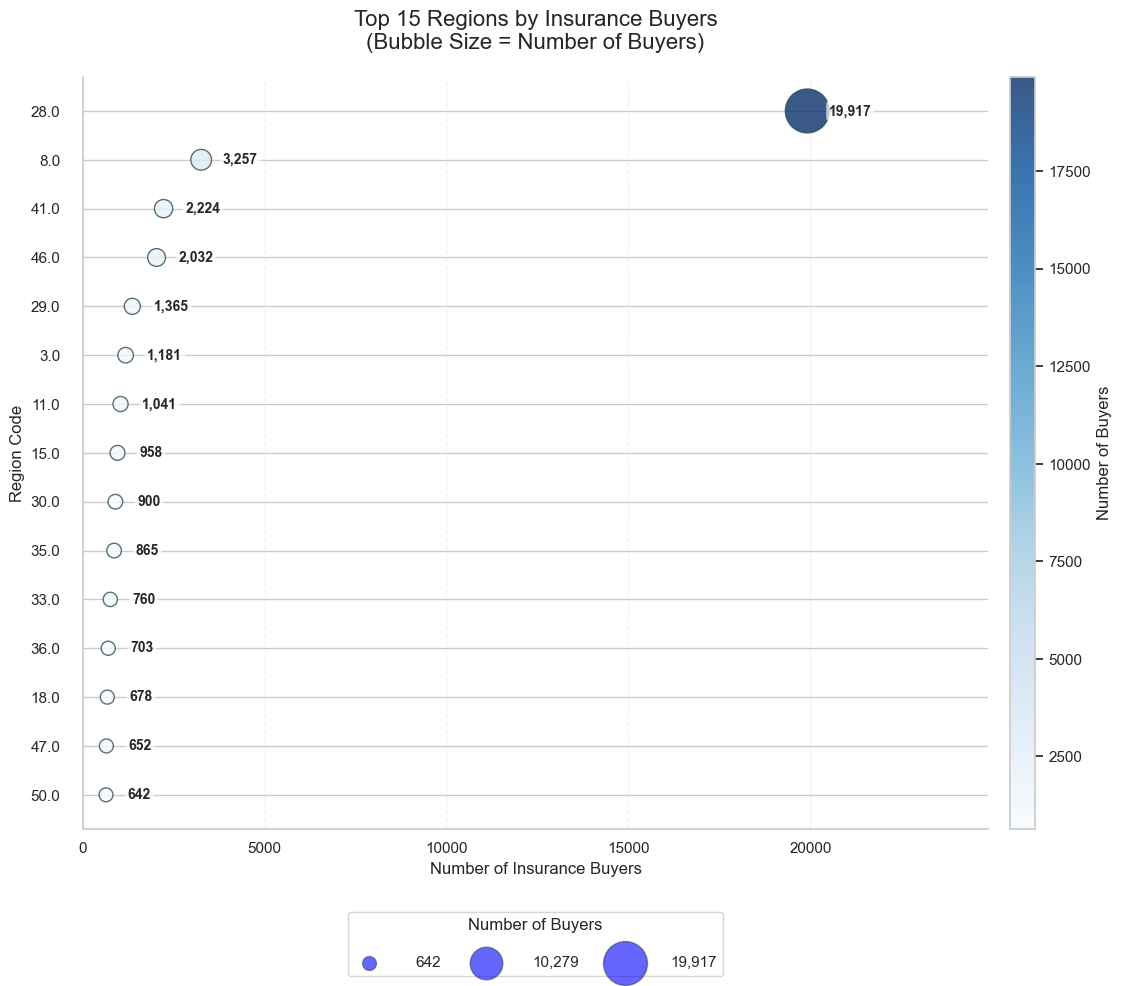

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Top 15 converting regions
top_regions = df[df['Response'] == 1]['Region_Code'].value_counts().head(15).reset_index()
top_regions.columns = ['Region_Code', 'Buyers']
top_regions = top_regions.sort_values('Buyers')  # Sort by buyers for better visualization

# Create figure and axis with better proportions
fig, ax = plt.subplots(figsize=(12, 10))  # Adjusted figure size for better proportions

# Set color map for number of buyers
cmap = cm.get_cmap('Blues')
norm = plt.Normalize(top_regions['Buyers'].min(), top_regions['Buyers'].max())
colors = cmap(norm(top_regions['Buyers']))

# Calculate bubble sizes - improved scaling function
min_size = 100  # Minimum bubble size
max_size = 1000  # Maximum bubble size
size_range = max_size - min_size
sizes = min_size + size_range * (top_regions['Buyers'] - top_regions['Buyers'].min()) / (top_regions['Buyers'].max() - top_regions['Buyers'].min())

# Create bubble chart (horizontal) with improved spacing
scatter = ax.scatter(
    x=top_regions['Buyers'],  # X-axis is number of buyers
    y=range(len(top_regions)),  # Y-axis uses indices for region codes
    s=sizes,  # Size based on improved scaling
    c=top_regions['Buyers'],  # Color based on number of buyers
    cmap='Blues',
    alpha=0.8,
    edgecolors='darkslategrey',
    linewidths=1
)

# Set y-axis ticks and labels with proper alignment
ax.set_yticks(range(len(top_regions)))
ax.set_yticklabels(top_regions['Region_Code'].astype(str))

# Define a consistent margin for data labels
label_margin = top_regions['Buyers'].max() * 0.03

# Add data labels with better alignment
for i, row in enumerate(top_regions.itertuples()):
    # Calculate appropriate label position
    bubble_radius = np.sqrt(sizes[i] / np.pi)
    label_x_pos = row.Buyers + label_margin
    
    ax.text(
        label_x_pos,  # Position to the right of the bubble with consistent margin
        i,  # Y position
        f"{row.Buyers:,}",  # Add thousands separator for better readability
        va='center',  # Vertically centered with the bubble
        ha='left',    # Left-aligned for consistency
        fontsize=10,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)  # Background for better visibility
    )

# Add a colorbar with better positioning
cbar = plt.colorbar(scatter, pad=0.02, aspect=30)
cbar.set_label('Number of Buyers', fontsize=12)

# Set title and labels with proper alignment
ax.set_title('Top 15 Regions by Insurance Buyers\n(Bubble Size = Number of Buyers)', 
             fontsize=16, pad=20, loc='center')
ax.set_xlabel('Number of Insurance Buyers', fontsize=12)
ax.set_ylabel('Region Code', fontsize=12)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.3, axis='x')  # Only add horizontal grid lines

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add more space between y-axis labels and chart
ax.tick_params(axis='y', pad=10)

# Adjust x-axis to provide enough space for the largest bubble and its label
max_buyers = top_regions['Buyers'].max()
ax.set_xlim(0, max_buyers * 1.25)  # Add 25% extra space on the right

# Create a custom legend for bubble sizes
sizes_for_legend = [top_regions['Buyers'].min(), 
                    (top_regions['Buyers'].min() + top_regions['Buyers'].max()) / 2, 
                    top_regions['Buyers'].max()]
labels_for_legend = [f"{int(size):,}" for size in sizes_for_legend]

# Calculate corresponding visual sizes for the legend
legend_sizes = [min_size + size_range * (size - top_regions['Buyers'].min()) / 
                (top_regions['Buyers'].max() - top_regions['Buyers'].min()) 
                for size in sizes_for_legend]

# Add legend at the bottom with proper alignment
legend_handles = []
for s in legend_sizes:
    legend_handles.append(plt.scatter([], [], s=s, color='blue', alpha=0.6, 
                                     edgecolors='darkslategrey', linewidth=1))

ax.legend(legend_handles, labels_for_legend, 
         title="Number of Buyers",
         loc="upper center", 
         bbox_to_anchor=(0.5, -0.1),  # Position below the plot
         frameon=True, 
         ncol=3,  # Arrange horizontally
         title_fontsize=12,
         labelspacing=1.5, 
         handletextpad=2)  # Space between handle and text

# Ensure enough space at the bottom for the legend
plt.subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.show()

Q9 — What do all numerical features tell us about what drives conversion?

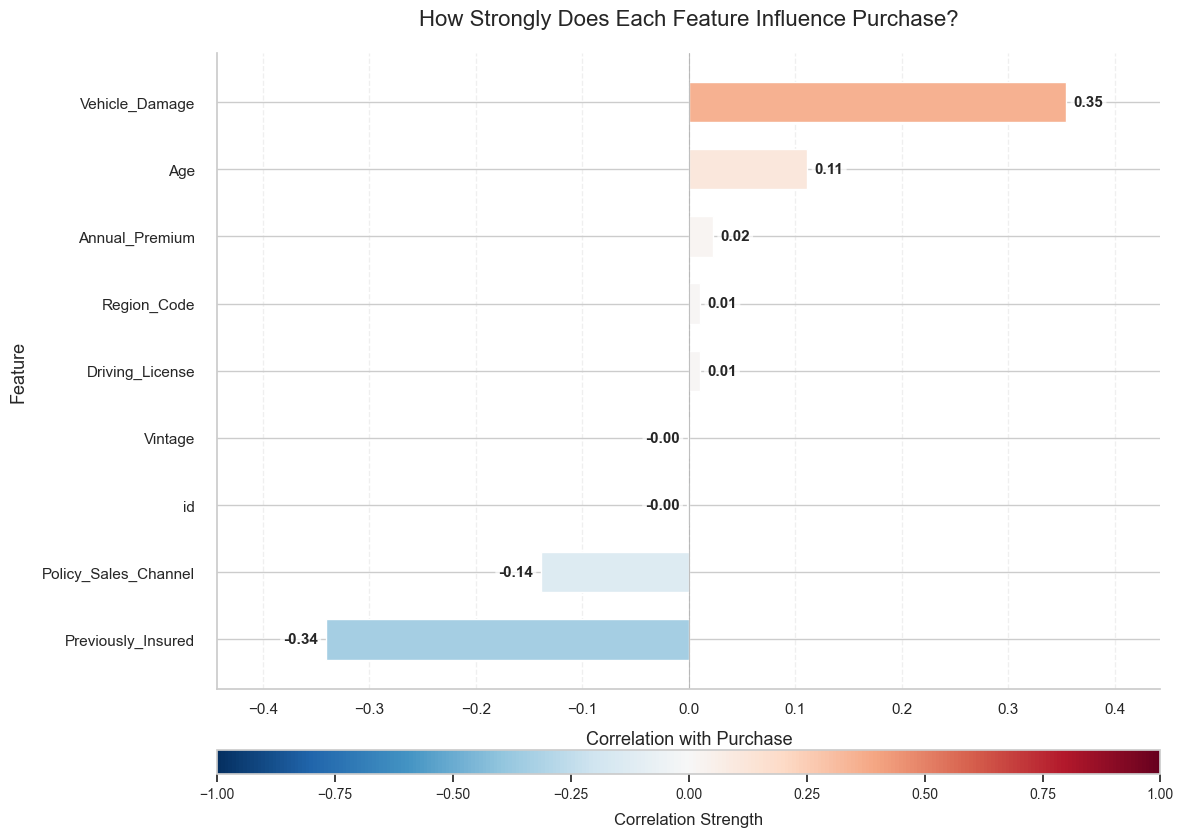

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract correlations with Response
response_corr = corr_matrix['Response'].drop('Response').sort_values()

# Convert to DataFrame for plotting
corr_df = response_corr.reset_index()
corr_df.columns = ['Feature', 'Correlation']

# Create figure and axis with better proportions
fig, ax = plt.subplots(figsize=(12, 9))

# Set up colormap - RdBu with neutral gray at zero
cmap = plt.cm.RdBu_r
norm = plt.Normalize(-1, 1)

# Increase spacing between bars
bar_height = 0.6
y_positions = np.arange(len(corr_df))

# Create horizontal bars with improved spacing
bars = ax.barh(
    y_positions, 
    corr_df['Correlation'],
    height=bar_height,
    color=[cmap(norm(x)) for x in corr_df['Correlation']]
)

# Add a vertical line at zero
ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)

# Add data labels with better alignment
for i, bar in enumerate(bars):
    width = bar.get_width()
    # Determine optimal label position and alignment
    if width >= 0:
        label_x_pos = width + max(abs(response_corr.min()), abs(response_corr.max())) * 0.02
        alignment = 'left'
    else:
        label_x_pos = width - max(abs(response_corr.min()), abs(response_corr.max())) * 0.02
        alignment = 'right'
    
    ax.text(
        label_x_pos,
        bar.get_y() + bar.get_height()/2,
        f'{width:.2f}',
        va='center',
        ha=alignment,
        fontweight='bold',
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
    )

# Set custom y-tick positions and labels with improved formatting
ax.set_yticks(y_positions)
ax.set_yticklabels(corr_df['Feature'], fontsize=11)

# Set title and labels with proper alignment
ax.set_title('How Strongly Does Each Feature Influence Purchase?', 
             fontsize=16, pad=20, loc='center')
ax.set_xlabel('Correlation with Purchase', fontsize=13, labelpad=10)
ax.set_ylabel('Feature', fontsize=13, labelpad=10)

# Set x-axis limits with better padding
max_abs_corr = max(abs(corr_df['Correlation'].max()), abs(corr_df['Correlation'].min()))
padding = max_abs_corr * 0.25  # 25% padding on each side
ax.set_xlim(-max_abs_corr - padding, max_abs_corr + padding)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.3, axis='x')

# Add better tick spacing
ax.tick_params(axis='y', pad=10)  # Add padding between y-axis labels and the plot
ax.tick_params(axis='both', which='major', labelsize=11)  # Consistent font size for tick labels

# Add color bar with better positioning and formatting
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.075, aspect=40)
cbar.set_label('Correlation Strength', size=12, labelpad=8)
cbar.ax.tick_params(labelsize=10)

# Adjust layout with more space at the bottom for the colorbar
plt.tight_layout()
plt.show()